In [15]:
import pandas as pd
import numpy as np
#import seaborn as sb
import matplotlib.pyplot as plt

#from sklearn.svm import SVR
#from skopt import gp_minimize
#from xgboost import XGBRegressor
#from skopt.plots import plot_convergence
#from bayes_opt import BayesianOptimization

from fastai.collab import CollabDataLoaders, collab_learner
from fastai.tabular.all import *

from statistics import stdev, variance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## Exploratory Analysis

In [2]:
# Import of taining and test data
train = pd.read_csv("dados/train.csv")
test = pd. read_csv("dados/test.csv")
print("Train " + str(train.shape))
print("Test " + str(test.shape))

Train (1092059, 4)
Test (537880, 3)


In [3]:
train.head(15)

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
5,5782_14,5782,14,-1.781
6,34059_62,34059,62,6.250
7,1159_9,1159,9,-2.906
8,17736_32,17736,32,-5.750
9,22626_22,22626,22,1.656


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092059 entries, 0 to 1092058
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1092059 non-null  object 
 1   user_id  1092059 non-null  int64  
 2   joke_id  1092059 non-null  int64  
 3   Rating   1092059 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.3+ MB


In [5]:
# Cheching uniqueness of data
train.select_dtypes(["int64", "float64", "object"]).nunique().sort_values().to_frame().T

,joke_id,Rating,user_id,id
0,139,641,40863,1092059


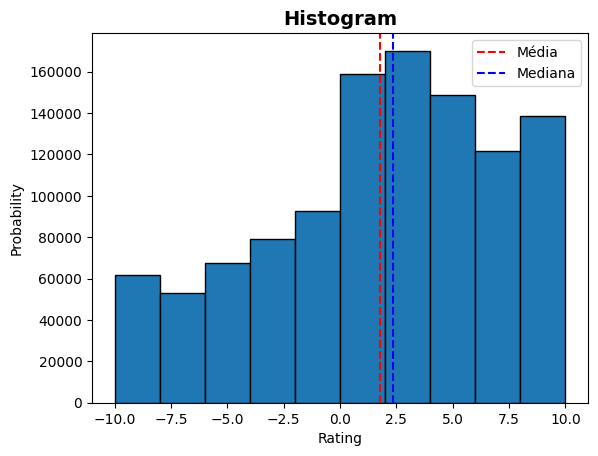

In [6]:
#plt.figure(figsize=(8, 6))
plt.hist(train.Rating, edgecolor="black")
plt.title("Histogram", fontweight="bold", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Probability")
plt.axvline(train.Rating.mean(), color="red", linestyle="--")
plt.axvline(train.Rating.median(), color="blue", linestyle="--")
plt.legend(title="", labels=["Média","Mediana"], ncol=1, loc="best")
plt.show()

In [7]:
#
stdev(train.Rating)

5.2308597557955006

In [8]:
#
variance(train.Rating)

27.361893784800966

## Data Pre-Processing

### Scaling

In [3]:
sc = StandardScaler()
X = train.drop(["id"], axis=1)
X = pd.DataFrame(sc.fit_transform(X), index=X.index, columns=X.columns)
X.head()

,user_id,joke_id,Rating
0,0.874570,1.042180,0.189569
1,-0.383722,1.019513,0.637679
2,0.204089,-1.315214,-1.566931
3,-0.541876,0.498166,0.506151
4,-0.191420,1.586194,1.456091


In [7]:
data_fc = CollabDataLoaders.from_df(
    X, 
    user_name="user_id", 
    item_name="joke_id", 
    rating_name="Rating", 
    bs=512,
    valid_pct=0.3, 
    shuffle_train=True 
)

data_fc.show_batch()

,user_id,joke_id,Rating
0,-0.737221,1.404856,-0.055324
1,0.917088,0.090155,-0.915604
2,0.445503,-1.247213,-0.909678
3,-1.702369,-0.748533,-1.465227
4,-1.684195,0.974178,1.103568
5,0.480244,0.430164,0.984085
6,-0.017037,0.475499,-2.211950
7,-1.248028,-0.861869,0.649531
8,-1.154623,-0.884537,0.739192
9,0.586666,-0.725866,0.243288


In [13]:
model = collab_learner(data_fc, use_nn=False, y_range=(-10. ,10.), n_factors=100)
model.fit_one_cycle(n_epoch=10, lr_max=5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.667865,0.666670,01:11
1,0.640893,0.683464,01:09
2,0.475805,0.732874,01:08
3,0.419702,0.727232,01:10
4,0.312703,0.713208,01:10
5,0.252540,0.692679,01:10
6,0.164381,0.675942,01:10
7,0.090836,0.665469,01:07
8,0.031921,0.665110,01:08
9,0.009278,0.666575,01:10


In [14]:
model.show_results()

,user_id,joke_id,Rating,Rating_pred
0,19402.0,56.0,0.416682,0.429200
1,20384.0,139.0,-0.981368,0.480558
2,5475.0,77.0,0.243288,-0.418051
3,6849.0,16.0,0.751236,0.801044
4,544.0,119.0,0.380742,0.464964
5,39356.0,125.0,-0.288365,0.936972
6,10612.0,6.0,-1.441330,-0.735241
7,767.0,9.0,-0.055324,-0.042352
8,39645.0,32.0,-1.632504,1.070053


### Split

## Models

### Linear Regression

## Submission

In [33]:
submit_id = pd.read_csv("dados/test.csv")["id"]
submit = pd.DataFrame({"id": submit_id, "Rating": abs(model2.predict(test))}, columns=["id", "Rating"])
submit.to_csv("submission.csv", index=False)
submit.head()

,id,Rating
0,6194_11,3.710104
1,19356_3,0.379057
2,23426_79,0.550185
3,40030_3,3.956149
4,19806_115,4.530601
